## NLP Poject - Analyzing Customer Reviews for Anker Q35 Headphones on Amazon.com

*Author: Olalekan Fagbuyi*

Sentiment analysis is a machine learning technique that uses computational linguistics and natural language processing (NLP) to identify opinions from large volumes of texts in an efficient manner. This technique can be used by businesses and individuals alike in making economic decisions such as; product purchase, competitor analysis, gaining customer insights etc. My purchase of the [Anker Q35 Noise Cancelling Headpones](https://www.amazon.com/Soundcore-Cancelling-Headphones-Bluetooth-Comfortable/dp/B09FPCZ318/ref=cm_cr_arp_d_product_top?ie=UTF8) during the recent [Black Friday](https://www.amazon.com/blackfriday/) promo on Amazon presented an opportunity to apply NLP techniques while making a purchase decision. 

This project focuses on capturing customer sentiment on Amazon.com, the leading e-commerce webiste site. Instead of manually reading each customer's feedback, opinions from 300 verified sales transactions were minned and analyzed. Textual data reviewed for this projects comes  with numerical ratings ranging from 1 to 5 stars (1: negative, 5: positive). This numerical indicator will be used as labels that represent the sentiment of the review text.

### Table of Contents

1. Importing Libraries
2. Data Minning - Webscrapping Amazon.com
3. Data Pre-processing and Exploratory Data Analysis
4. Text Processing
5. Sentiment Analysis - Polarity and Subjectivity
6. Word Distribtuion

### 1. Importing Libraries

A number of libraries were used to bring this project to life, they include;

i.   Core python packages - pandas and np

ii:  Vizualization packages - matplotlib, seaborn, plotly

iii: Webscrapping packages - Beautiful soup, requests, sleep, randint

iv:  Natural language processing packages - nltk, re, stop_words, FreqDistr, PIL, et al to process textual data

In [20]:
#importing required libraries

#core python packages for data analysis and arithmetics
import pandas as pd #for data analysis and manipulaion
import numpy as np #for mathematical operations

#vizualization packages
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import plotly.express as px
style.use('ggplot')

#for scrapping Amazon.com for customer reviews
from bs4 import BeautifulSoup
import requests
from requests_html import HTMLSession
from time import sleep
from random import randint

#word processing pakcages
import re #for RegEx (regular experessions) which is a sequence of characters that forms a search pattern.
import string
from textblob import TextBlob #for processing textual data
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") 
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from nltk.probability import FreqDist
import os
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ofagb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ofagb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ofagb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 2. Data Minning - Webscrapping Amazon.com

Data used for this project was scrapped off Amazon.com using the Requests and Beautiful Soup libraries.  Instead of manually reading each customer's feedback, opinions from 300 verified sales transactions were minned and analyzed. Username, review details, ratings and color of item purchased were the product features scrapped looping through 30 pages of reviews

In [3]:
#headers are needed when scrapping amazon for accessibility. Also add referer after header
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
(KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.42','Referer': 'https://www.amazon.com/'}

#url
url = 'https://www.amazon.com/Soundcore-Cancelling-Headphones-Bluetooth-Comfortable/\
product-reviews/B09FPCZ318/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [5]:
#connect to website (response 200 means connection is good)
response = requests.get(url, headers = header)
soup = BeautifulSoup(response.content, 'html.parser')
response

<Response [200]>

In [6]:
#creating an empty list, so that we can append the values
username = []
review_details = []
ratings = []
colour = []

In [7]:
#looping through first 30 pages
pages = list(range(1,31))
for page in pages:
    page = requests.get('https://www.amazon.com/Soundcore-Cancelling-Headphones-Bluetooth-Comfortable/product-reviews/B09FPCZ318/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(page)+"')
    soup = BeautifulSoup(response.content, 'html.parser')
    reviews = soup.findAll('div', attrs = {'class':'a-section celwidget'})
    sleep(randint(2,8))
    for review in reviews:
        user =  getattr(review.a.find('span', class_ = 'a-profile-name'), 'text', None)
        username.append(user)
        
        details = getattr(review.find('div', class_ = 'a-row a-spacing-small review-data'), 'text', None).replace('\n','')
        review_details.append(details)
        
        rating = getattr(review.find('span', class_ = 'a-icon-alt'), 'text', None)
        ratings.append(rating)
    
        color = getattr(review.find('a', class_ = 'a-size-mini a-link-normal a-color-secondary'), 'text', None)
        colour.append(color)

In [21]:
#store results in a dataframe
amazon_review = pd.DataFrame({'Username': username, 'Review': review_details, 'User Rating': ratings, 'Color': colour})

### 3. Data Pre-processing and Exploratory Data Analysis

After loading the amazon_reviews dataset, data pre-processing and exploratory analysis steps were carried out to prepare to the dataset for text processing. Such steps includes; checking for null, removing duplicates, formating columns (User ratings and column), and dropping unnecessary columns.

The numbers in the User Rating columns was converted from a string into an integer after extracting the numeric component. While Color where stored in the Q35 Color column after splitting the strings on the ':' character.

In [107]:
#load dataset
#latin1 was used as encoding because csv could not load on default utf-8
amazon_reviews = pd.read_csv("C:\\Users\\ofagb\\OneDrive\\Documents\\Machine Learning\\Amazon NLP\\Anker Q35 Amazon Reviews.csv", encoding = 'latin1')
amazon_reviews

,Unnamed: 0,Username,Review,User Rating,Color
0,0,LightCC,Note: This is specific to the Q35 headset with...,3.0 out of 5 stars,Color: Black
1,1,Nhat Nguyen,I've been shopping around for some decent LDAC...,5.0 out of 5 stars,Color: Black
2,2,HJeffK,I am a giant Anker fan. I have owned their cor...,5.0 out of 5 stars,Color: Blue
3,3,yuuxno,"Well, the sound quality is excelent, but the m...",4.0 out of 5 stars,Color: Black
4,4,HipGuy,I use this headphone to connect to PC and Phon...,4.0 out of 5 stars,Color: Black
...,...,...,...,...,...
355,355,KayBee,"Everything came as stated, headphones, case, a...",5.0 out of 5 stars,Color: Blue
356,356,Charles Schneider,Good headphones for the price. Not crazy loud ...,4.0 out of 5 stars,Color: Black
357,357,Alexander Padalino,I have had these headphones for about a week n...,2.0 out of 5 stars,Color: Blue
358,358,Ravi,Excellent for sound. Noise canceling is average.,3.0 out of 5 stars,Color: Blue


In [108]:
#drop 'Unamed' column
amazon_reviews.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
amazon_reviews.head()

,Username,Review,User Rating,Color
0,LightCC,Note: This is specific to the Q35 headset with...,3.0 out of 5 stars,Color: Black
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,5.0 out of 5 stars,Color: Black
2,HJeffK,I am a giant Anker fan. I have owned their cor...,5.0 out of 5 stars,Color: Blue
3,yuuxno,"Well, the sound quality is excelent, but the m...",4.0 out of 5 stars,Color: Black
4,HipGuy,I use this headphone to connect to PC and Phon...,4.0 out of 5 stars,Color: Black


In [109]:
#checking for null values
amazon_reviews.isnull().sum()

Username       0
Review         0
User Rating    0
Color          0
dtype: int64

In [110]:
#checking for duplicates?
duplicates = amazon_reviews.duplicated().sum()
duplicates

52

In [111]:
#drop duplicates - keep arguement can be first, last or False(meaning delete both). inplace argument ensnures changes affect original df
amazon_reviews.drop_duplicates(keep = 'first', inplace = True)
amazon_reviews.shape

(308, 4)

In [112]:
#count of unique values in each column
amazon_reviews.nunique()

Username       300
Review         308
User Rating      4
Color            3
dtype: int64

In [113]:
amazon_reviews.head()

,Username,Review,User Rating,Color
0,LightCC,Note: This is specific to the Q35 headset with...,3.0 out of 5 stars,Color: Black
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,5.0 out of 5 stars,Color: Black
2,HJeffK,I am a giant Anker fan. I have owned their cor...,5.0 out of 5 stars,Color: Blue
3,yuuxno,"Well, the sound quality is excelent, but the m...",4.0 out of 5 stars,Color: Black
4,HipGuy,I use this headphone to connect to PC and Phon...,4.0 out of 5 stars,Color: Black


In [114]:
#Augumenting columns
#1. Creating star ratings columns and storing as an int
amazon_reviews['Star_Ratings'] = amazon_reviews['User Rating'].str[0:1] #extracting first string of user rating column
amazon_reviews['Star_Ratings'] = amazon_reviews['Star_Ratings'].astype('int32') #converting string column to int
amazon_reviews.head()

,Username,Review,User Rating,Color,Star_Ratings
0,LightCC,Note: This is specific to the Q35 headset with...,3.0 out of 5 stars,Color: Black,3
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,5.0 out of 5 stars,Color: Black,5
2,HJeffK,I am a giant Anker fan. I have owned their cor...,5.0 out of 5 stars,Color: Blue,5
3,yuuxno,"Well, the sound quality is excelent, but the m...",4.0 out of 5 stars,Color: Black,4
4,HipGuy,I use this headphone to connect to PC and Phon...,4.0 out of 5 stars,Color: Black,4


In [115]:
#2. Creating colour column by extracting color name from color column using .apply()- function splits on : then extract 1st string
amazon_reviews['Q35 Color'] = amazon_reviews['Color'].apply(lambda x: x.split(':')[1])
amazon_reviews.head()

,Username,Review,User Rating,Color,Star_Ratings,Q35 Color
0,LightCC,Note: This is specific to the Q35 headset with...,3.0 out of 5 stars,Color: Black,3,Black
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,5.0 out of 5 stars,Color: Black,5,Black
2,HJeffK,I am a giant Anker fan. I have owned their cor...,5.0 out of 5 stars,Color: Blue,5,Blue
3,yuuxno,"Well, the sound quality is excelent, but the m...",4.0 out of 5 stars,Color: Black,4,Black
4,HipGuy,I use this headphone to connect to PC and Phon...,4.0 out of 5 stars,Color: Black,4,Black


In [116]:
#drop unnecessary columns
#drop 'Unamed' column
amazon_reviews.drop(['User Rating', 'Color'], axis = 1, inplace = True)
amazon_reviews.head()

,Username,Review,Star_Ratings,Q35 Color
0,LightCC,Note: This is specific to the Q35 headset with...,3,Black
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,5,Black
2,HJeffK,I am a giant Anker fan. I have owned their cor...,5,Blue
3,yuuxno,"Well, the sound quality is excelent, but the m...",4,Black
4,HipGuy,I use this headphone to connect to PC and Phon...,4,Black


Average Rating =  4.298701298701299


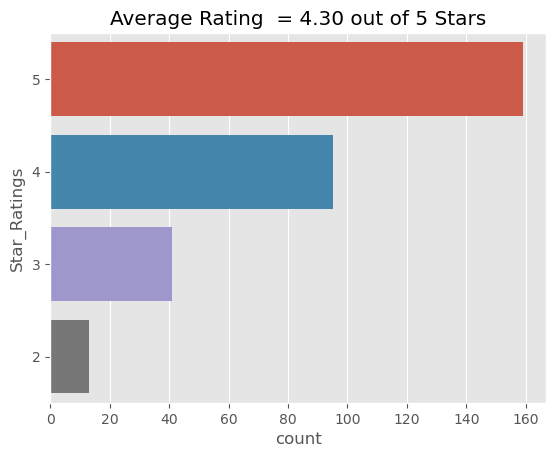

In [156]:
#Visualisating Ratings distribution
graph = sns.countplot(y = 'Star_Ratings', data = amazon_reviews, 
              order = amazon_reviews['Star_Ratings'].value_counts().index).set(title='Average Rating  = 4.30 out of 5 Stars')
plt.savefig('Ratings Distr.png')
#Average Rating
print('Average Rating = ', amazon_reviews['Star_Ratings'].mean())

In [67]:
#Most popular Colors
Color_Distr = amazon_reviews['Q35 Color'].value_counts()
Color_Distr

 Blue     171
 Black    107
 Pink      30
Name: Q35 Color, dtype: int64

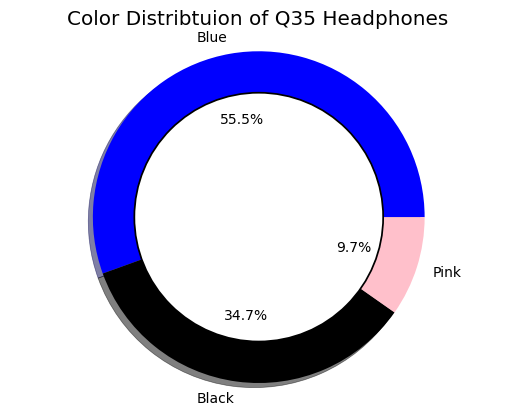

In [74]:
# Visualizing Color Distribution using Donut Chart
labels = 'Blue', 'Black', 'Pink'
sizes = [171, 107, 30]
colors = ['blue', 'black', 'pink']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Color Distribtuion of Q35 Headphones')
plt.savefig("Color Distr.jpg")
plt.show()

### 4. Text Processing

Text processing is an important part of NLP which involves converting raw corups into machine readable form using a suite of libraries from the NLTK tool kit. Raw text corpus, are usuually filled with inconsistencies and ambiguity that requires preprocessing for cleaning it up.

Techniques such as stop words, tokenization, and stemming were applied.If text preprocessing is not done properly the data will be as good as garbage and the NLP model produced will be as bad as garbage only.

In [127]:
#selecting only text column
text_df = amazon_reviews[['Username', 'Review']]
text_df.rename(columns = {'Review':'text'}, inplace = True) #rename Review column as text
text_df.head()

,Username,text
0,LightCC,Note: This is specific to the Q35 headset with...
1,Nhat Nguyen,I've been shopping around for some decent LDAC...
2,HJeffK,I am a giant Anker fan. I have owned their cor...
3,yuuxno,"Well, the sound quality is excelent, but the m..."
4,HipGuy,I use this headphone to connect to PC and Phon...


In [229]:
#stop words are common words in english that add little or no value in NLP
stop_words = list(stopwords.words('english'))

#user defined common words that do not add value in the context of the show will also be removed
other_stop_words = ['im','say', 'said', 'seen','see','watched','ive','cant wait', 'doesnt', 'even','youre', 'last','night',
                    'ok','dont' 'im','wanna', 'gonna', 'though', 'they', 'like', 'really', 'shes', 'get', 'one','still',
                   'went', 'seeing', 'cant', 'isnt', 'e', 'u', 'wanna', 'many', 'done', 'wasnt', 'let', 'done', 'dont',
                    'q', 'headphone', 'headphones', 'use', 'anker', 'soundcore', 'time', 'head', 'also', 'anc', 'would', 'should', 'qs', 'much']

stop_words = stop_words + other_stop_words

In [230]:
# text pre-processing - cleaning unstructured texts for analysis
def preprocessing(text):
    text = text.lower() #text to lower case
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE) #removes url
    text = re.sub(r'\@w+|\#','',text) #removeshashtags
    text = re.sub(r'[^\w\s]','',text) #replaces unwanted strings
    text = re.sub(r'@[^ ]+', '', text) #removes username
    text = re.sub(r'([A-Za-z])\1{2,}', r'\1', text) #normalizes word e.g todaaaaay as today
    text = re.sub(r'[^A-Za-z ]', '', text) #punctuations, special characters, numbers
    text = text.replace("[^a-zA-Z]", " ")
    text_tokens = word_tokenize(text) #applying tokenization
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [231]:
#aplying text processing operations to df
text_df['processed_text'] = text_df['text'].apply(preprocessing)
text_df.head()

,Username,text,processed_text,Polarity,P_Sentiment,Star_Ratings,Subjectivity,S_Sentiment
0,LightCC,Note: This is specific to the Q35 headset with...,note specific headset advanced sound mic proce...,0.200867,Positive,3,0.509122,Subjective
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,shopping around decent ldac enabled pair fiio ...,0.129812,Positive,5,0.595955,Subjective
2,HJeffK,I am a giant Anker fan. I have owned their cor...,giant fan owned cords cables years always high...,0.310839,Positive,5,0.527799,Subjective
3,yuuxno,"Well, the sound quality is excelent, but the m...",well sound quality excelent mic bad range conn...,-0.067424,Negative,4,0.613131,Subjective
4,HipGuy,I use this headphone to connect to PC and Phon...,connect pc phone pc watching movie meeting con...,0.123492,Positive,4,0.365714,Objective


### 5. Sentiment Analysis

Textblob is a NLP python library used to analyze unstructured data in textual form.The library gives 2 outputs called polarity and subjectivity. 

Polarity ranges from -1 to 1, where -1 refers to negative sentiment and +1 refers to positive sentiment. Subjectivity is a measure of how a statement shows the writers personal opinions and beliefs, or if it is factual. The score lies between 0 (fact) and 1 (personal opinion). 

#### 5.1. Polarity

In [141]:
#Calculating text polarity using TextBlob
def polarity(processed_text):
    return TextBlob(processed_text).sentiment.polarity

#Add polarity score to df
text_df['Polarity'] = text_df['processed_text'].apply(polarity)
text_df.head()

,Username,text,processed_text,Polarity
0,LightCC,Note: This is specific to the Q35 headset with...,note specific q headset advanced sound mic pro...,0.200867
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,shopping around decent ldac enabled headphones...,0.129812
2,HJeffK,I am a giant Anker fan. I have owned their cor...,giant anker fan owned cords cables years alway...,0.310839
3,yuuxno,"Well, the sound quality is excelent, but the m...",well sound quality excelent mic bad also range...,-0.067424
4,HipGuy,I use this headphone to connect to PC and Phon...,use headphone connect pc phone time pc watchin...,0.123492


In [142]:
#Creating polarity sentiment column
def p_sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
    
#Add sentiment column to df
text_df['P_Sentiment'] = text_df['Polarity'].apply(p_sentiment)
text_df.head()

,Username,text,processed_text,Polarity,P_Sentiment
0,LightCC,Note: This is specific to the Q35 headset with...,note specific q headset advanced sound mic pro...,0.200867,Positive
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,shopping around decent ldac enabled headphones...,0.129812,Positive
2,HJeffK,I am a giant Anker fan. I have owned their cor...,giant anker fan owned cords cables years alway...,0.310839,Positive
3,yuuxno,"Well, the sound quality is excelent, but the m...",well sound quality excelent mic bad also range...,-0.067424,Negative
4,HipGuy,I use this headphone to connect to PC and Phon...,use headphone connect pc phone time pc watchin...,0.123492,Positive


In [149]:
#polarity count
P_Sent_Count = text_df['P_Sentiment'].value_counts()
P_Sent_Count

Positive    285
Negative     16
Neutral       7
Name: P_Sentiment, dtype: int64

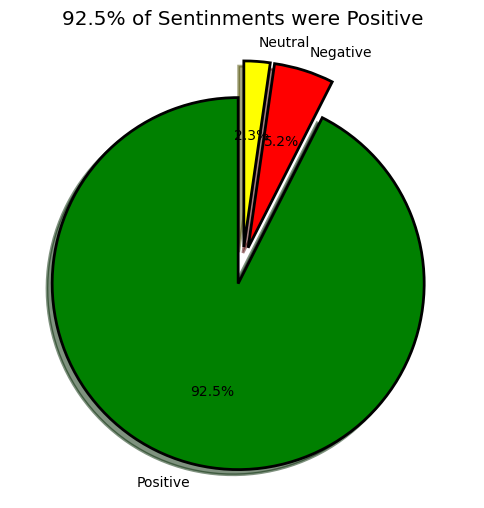

In [155]:
#Sentiment percentage
fig = plt.figure(figsize=(6,10))
colors = ("green", "red", "yellow")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['P_Sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('92.5% of Sentinments were Positive')
plt.savefig("Sentiment Distr.jpg")

In [157]:
#Checking for correlations between Star Ratings and Polarity

#first add Star Ratings column to text df
text_df['Star_Ratings']= amazon_reviews['Star_Ratings']
text_df.head()

,Username,text,processed_text,Polarity,P_Sentiment,Star_Ratings
0,LightCC,Note: This is specific to the Q35 headset with...,note specific q headset advanced sound mic pro...,0.200867,Positive,3
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,shopping around decent ldac enabled headphones...,0.129812,Positive,5
2,HJeffK,I am a giant Anker fan. I have owned their cor...,giant anker fan owned cords cables years alway...,0.310839,Positive,5
3,yuuxno,"Well, the sound quality is excelent, but the m...",well sound quality excelent mic bad also range...,-0.067424,Negative,4
4,HipGuy,I use this headphone to connect to PC and Phon...,use headphone connect pc phone time pc watchin...,0.123492,Positive,4


In [164]:
#calculating correlation between Polarity and Star Ratings
cor = text_df.corr() #checking for cor among features
cor

,Polarity,Star_Ratings
Polarity,1.000000,0.263322
Star_Ratings,0.263322,1.000000


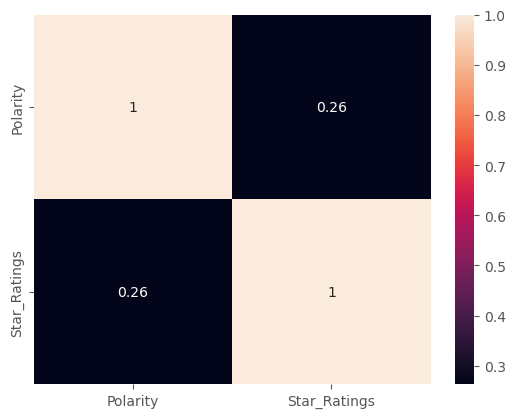

In [167]:
sns.heatmap(cor, annot = True)
plt.savefig('Corr Ratings & Polarity.png')

#### 5.2. Subjectivity

In [169]:
#Calculating text subjectivity using TextBlob
def subjectivity(processed_text):
    return TextBlob(processed_text).sentiment.subjectivity

#Add subjectivity score to df
text_df['Subjectivity'] = text_df['processed_text'].apply(subjectivity)
text_df.head()

,Username,text,processed_text,Polarity,P_Sentiment,Star_Ratings,Subjectivity
0,LightCC,Note: This is specific to the Q35 headset with...,note specific q headset advanced sound mic pro...,0.200867,Positive,3,0.509122
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,shopping around decent ldac enabled headphones...,0.129812,Positive,5,0.595955
2,HJeffK,I am a giant Anker fan. I have owned their cor...,giant anker fan owned cords cables years alway...,0.310839,Positive,5,0.527799
3,yuuxno,"Well, the sound quality is excelent, but the m...",well sound quality excelent mic bad also range...,-0.067424,Negative,4,0.613131
4,HipGuy,I use this headphone to connect to PC and Phon...,use headphone connect pc phone time pc watchin...,0.123492,Positive,4,0.365714


In [170]:
#Creating polarity sentiment column
def s_sentiment(label):
    if label <0.5:
        return "Objective"
    elif label ==0.5:
        return "Objective"
    elif label>0.5:
        return "Subjective"
    
#Add sentiment column to df
text_df['S_Sentiment'] = text_df['Subjectivity'].apply(s_sentiment)
text_df.head()

,Username,text,processed_text,Polarity,P_Sentiment,Star_Ratings,Subjectivity,S_Sentiment
0,LightCC,Note: This is specific to the Q35 headset with...,note specific q headset advanced sound mic pro...,0.200867,Positive,3,0.509122,Subjective
1,Nhat Nguyen,I've been shopping around for some decent LDAC...,shopping around decent ldac enabled headphones...,0.129812,Positive,5,0.595955,Subjective
2,HJeffK,I am a giant Anker fan. I have owned their cor...,giant anker fan owned cords cables years alway...,0.310839,Positive,5,0.527799,Subjective
3,yuuxno,"Well, the sound quality is excelent, but the m...",well sound quality excelent mic bad also range...,-0.067424,Negative,4,0.613131,Subjective
4,HipGuy,I use this headphone to connect to PC and Phon...,use headphone connect pc phone time pc watchin...,0.123492,Positive,4,0.365714,Objective


In [171]:
#subjectivity count
S_Sent_Count = text_df['S_Sentiment'].value_counts()
S_Sent_Count

Subjective    215
Objective      93
Name: S_Sentiment, dtype: int64

### 6. Word Distribtution

This section of the project involves creating a dataframe containing most used word using the FreqDist() library. After this, the most common words will be displayed in a wordcloud.

In [232]:
word_count = text_df['processed_text'].str.split().explode().value_counts()
word_count.head(20)

sound          343
noise          243
good           228
great          206
quality        205
phone          132
app            130
music          125
price          123
better         110
work           108
well           101
life            97
pair            92
battery         88
headset         84
bluetooth       80
audio           80
comfortable     77
ear             73
Name: processed_text, dtype: int64

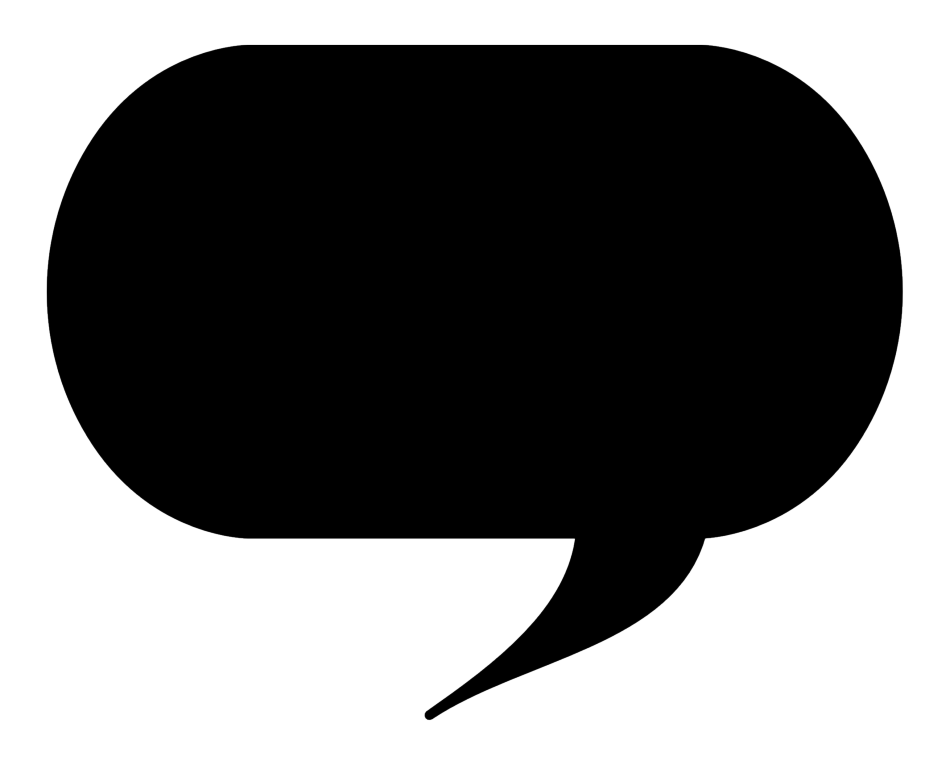

In [223]:
#importing word cloud image from directory
mask = np.array(Image.open("C:\\Users\\ofagb\\OneDrive\\Documents\\Machine Learning\\Amazon NLP\\Talk 2.png"))
plt.figure(figsize = (12,10))
plt.imshow(mask, interpolation='bilinear') 
plt.axis('off') 
plt.show()

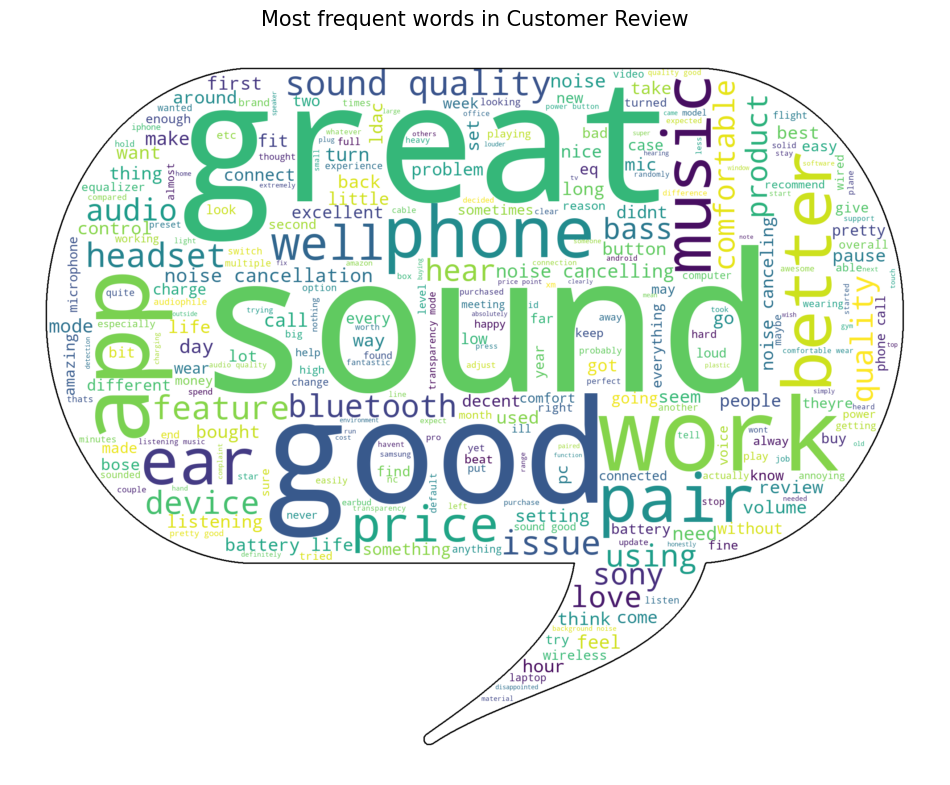

In [233]:
#create word cloud for most positive tweets
text = ' '.join([word for word in text_df['processed_text']])
plt.figure(figsize=(12,10), facecolor='None')
wordcloud = WordCloud(background_color = 'white', contour_color = 'black', contour_width = 3, max_words=300, width=1600, 
                      min_font_size = 8, height=800, mask = mask).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Customer Review', fontsize=15)
plt.savefig("Amazon Review WordCloud.jpg")
plt.show()